### 1. Хотим пятерку, а на деле...

Кластеризуйте данный датасет с помощью метода `k-means`. На основе трёх различных __внутренних__ метрик оценки кластеризации, подберите наилучшее количество кластеров $k$.



In [67]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
k = KMeans(n_clusters=5, n_init='auto')
k.fit(X)
indices = k.predict(X)
centers = k.cluster_centers_

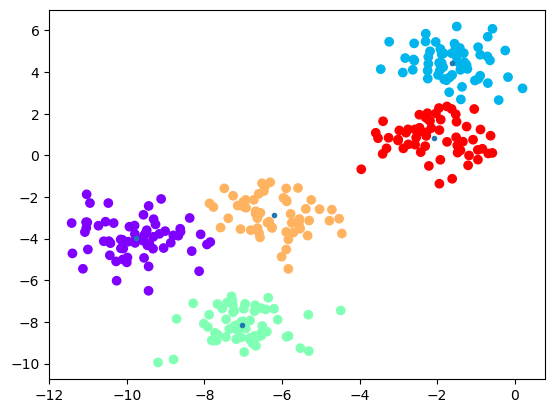

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(indices / indices.max())
plt.scatter(X.T[0], X.T[1], color=colors)
plt.plot(centers.T[0], centers.T[1], '.')

/tmp/ipykernel_24982/3952386489.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  means = pd.concat([means, measure])


<Axes: xlabel='clusters'>

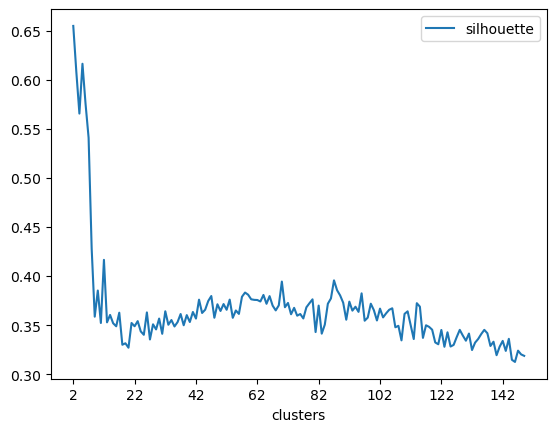

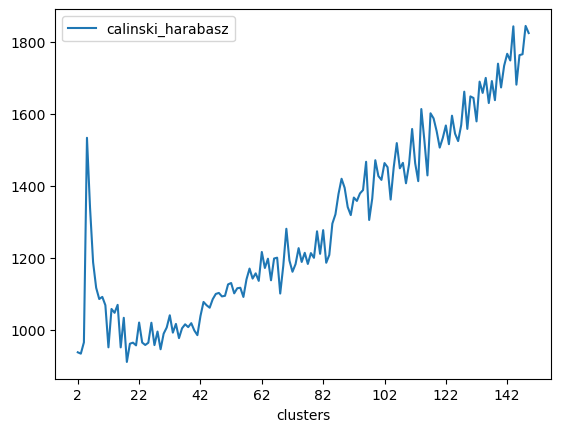

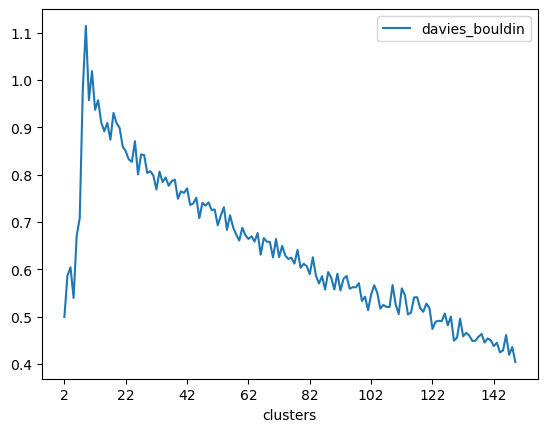

In [97]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

points, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

means = pd.DataFrame(columns=['clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])
for n in range(2, len(points) // 2):
    k = KMeans(n_clusters=n, n_init='auto')
    k.fit(points)
    indices = k.predict(points)
    measure = pd.DataFrame({
        'clusters': n,
        'silhouette': silhouette_score(points, indices),
        'calinski_harabasz': calinski_harabasz_score(points, indices),
        'davies_bouldin': davies_bouldin_score(points, indices),
    }, index=[n])
    means = pd.concat([means, measure])

means.plot('clusters', 'silhouette')
means.plot('clusters', 'calinski_harabasz')
means.plot('clusters', 'davies_bouldin')

По silhouette лучшие разбиения на 2 и 5 кластеров. По calinski_harabasz на 5, по davies_bouldin тоже на 5

### 2. Повторение - мать ученья

Для предыдущего датасета подберите наилучшие гиперпараметры (мера несходства) с использованием агломеративного метода. Постройте дендрограмму для наилучшей модели. 


In [109]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

centers = 5
points, _ = make_blobs(n_samples=300, centers=centers, cluster_std=0.85, random_state=1)

linkages = ['ward', 'complete', 'average', 'single']
means = pd.DataFrame(columns=['linkage', 'silhouette', 'calinski_harabasz', 'davies_bouldin'])
for linkage in linkages:
    clustering = AgglomerativeClustering(n_clusters=centers, linkage=linkage)
    indices = clustering.fit_predict(points)
    measure = pd.DataFrame({
        'linkage': linkage,
        'silhouette': silhouette_score(points, indices),
        'calinski_harabasz': calinski_harabasz_score(points, indices),
        'davies_bouldin': davies_bouldin_score(points, indices),
    }, index=[0])
    means = pd.concat([means, measure], ignore_index=True)
means

/tmp/ipykernel_24982/3659547685.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  means = pd.concat([means, measure], ignore_index=True)


,linkage,silhouette,calinski_harabasz,davies_bouldin
0,ward,0.612703,1517.694206,0.542396
1,complete,0.557644,1257.158966,0.595175
2,average,0.614422,1524.573459,0.541146
3,single,0.376244,470.617306,0.694381


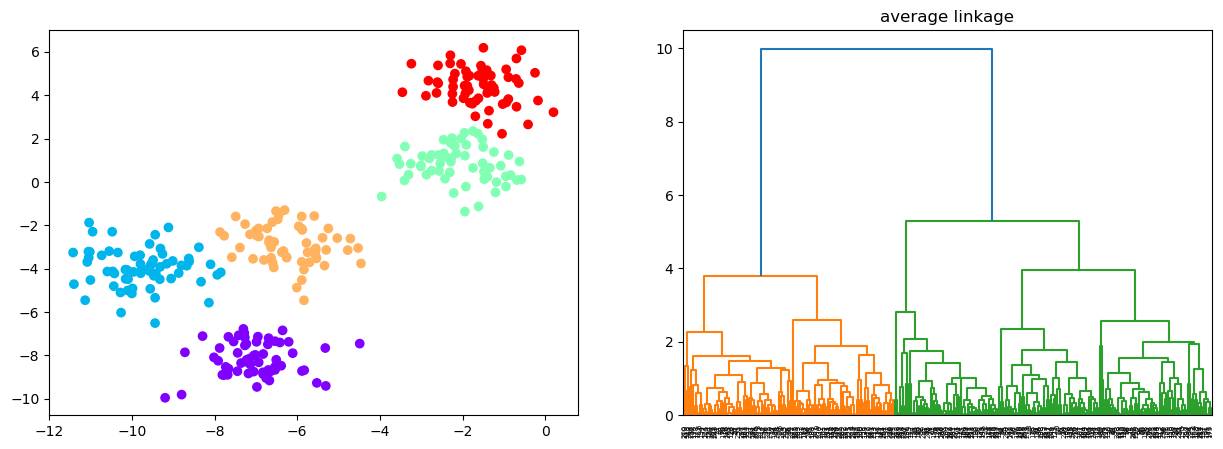

In [111]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
clusters = clustering.fit_predict(points)
z = linkage(points, method='average')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(points.T[0], points.T[1], c=clusters, cmap='rainbow')

dendrogram(z, ax=axs[1])
plt.title('average linkage')
plt.show()

### 3. Матрица расстояний (смежности) и матрица сходств

Расстояния между парами векторов из двух множеств $d\left(X_l, X_j\right)$ могут быть представлены в виде симметричной матрицы расстояний (матрица смежности):

$$
D=\left(\begin{array}{cccc}
0 & d_{12} & \ldots & d_{1 n} \\
d_{21} & 0 & \ldots & d_{2n} \\
\ldots & \ldots & \ldots & \ldots \\
d_{n 1} & d_{n 2} & \ldots & 0
\end{array}\right)
$$

Понятием, противоположным расстоянию, является понятие сходства между объектами. Неотрицательная вещественная функция $S\left(x_i , x_j\right)=S_{i j}$ называется __мерой сходства__, если:


1) $0 \leq S\left(x_i, x_j\right)<1$ для $x_i \neq x_j$

2) $S\left(x_i, x_i\right)=1$

3) $S\left(x_i, x_j\right)=S\left(x_j, x_i\right)$

Пары значений мер сходства можно объединить в __матрицу сходства__:

$$
S=\left(\begin{array}{cccc}
1 & s_{12} & \ldots & s_{1 n} \\
s_{21} & 1 & \ldots & s_{2 n} \\
s_{n 1} &  s_{n 2} & \ldots & 1
\end{array}\right)
$$

Величину $S_{i j}$ называют __коэффициентом сходства__.

Постройте матрицу смежности по датасету первой задачи, взяв в качестве меры расстояния евклидову метрику.

Постройте на основе неё какую-нибудь матрицу сходства (вам надо самим придумать функцию сходства - просто удовлетвроите трём свойствам).

Визуализируйте обе матрицы в виде картинки. Используйте imshow() или pcolormesh() из Matplotlib.

Для получения матриц используйте функцию  [sklearn.metrics.pairwise_distances ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) (тут можно в качестве метрики использовать свою собственную функцию - так можно сделать матрицу сходств) или какую-то другую отсюда https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

Можно также посмотреть здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors , например, функцию neighbors.[kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph) 


In [118]:
from sklearn.metrics import pairwise_distances
import numpy as np

d = pairwise_distances(points)
s = np.exp(-d)
for i in range(len(points)):
    for j in range(len(points)):
        if i == j:
            if s[i][j] != 1:
                print(f's[{i}][{j}] = {s[i][j]} != 1')
        elif s[i][j] < 0:
            print(f's[{i}][{j}] = {s[i][j]} < 0')
        elif s[i][j] >= 1:
            print(f's[{i}][{j}] = {s[i][j]} >= 1')
        elif np.abs(s[i][j] - s[j][i]) > 1e-10:
            print(f's[{i}][{j}] = {s[i][j]} != {s[j][i]} = s[{j}][{i}]')

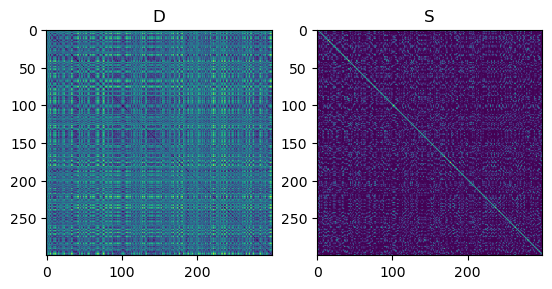

In [120]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].imshow(d)
axs[0].set_title('D')
axs[1].imshow(s)
axs[1].set_title('S')
plt.show()

### 4. Игрушечные галактики (Источник - Pelican :))

Следующий датасет содержит координаты в 3д некоторого набора галактик. Необходимо найти скопления этих самых галактик с помощью алгоритма `hdbscan` - смеси обычного dbscan и иерархического подхода. Точная формулировка задачи после кода.

Вам понадобится файл toy_galaxies.csv из гугл диска.


,x,y,z,label
0,-35.283431,-21.779673,-113.964124,1.0
1,-35.603636,-18.430420,-113.298009,1.0
2,-34.202934,-22.362906,-106.979709,1.0


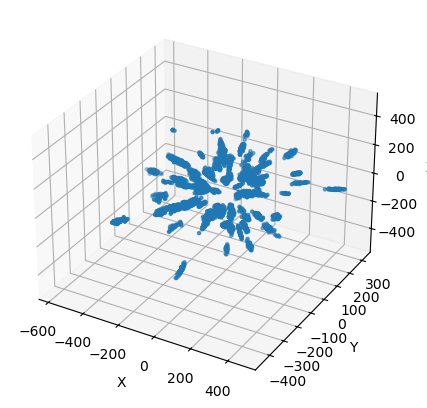

In [122]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#!pip install hdbscan
import hdbscan
from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering


data = pd.read_csv("toy_galaxies.csv") # Не забудьте скачать файл
display(data.head(3))

# Отобразим датасет
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, data.x,data.y,data.z, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [123]:
# Эта функция понадобится для отображения результата кластеризации и ARI
def plot_galaxies(data,cluster):
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(111, projection='3d')
    Axes3D.scatter(ax,data.x, data.y, data.z, marker='.', c=cluster.labels_);
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show();

    ARI = round(ari(data.label,cluster.labels_),4) # считаем ARI - оценка качества кластеризации


    print('ARI = {}'.format(ARI))


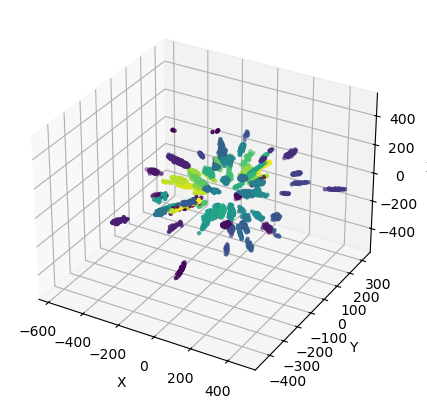

ARI = 0.9123


In [159]:
# hdbscan работает следующим образом
cluster = hdbscan.HDBSCAN(metric="euclidean",
                          min_cluster_size=7,
                          algorithm="generic",
                          alpha=0.1,
                          cluster_selection_method='eom')

cluster.fit(data[['x','y','z']].to_numpy())

plot_galaxies(data,cluster) # Отображаем кластеризацию и полученный ARI


In [157]:
def compute(alpha, size):
    cluster = hdbscan.HDBSCAN(metric="euclidean",
                              min_cluster_size=size,
                              algorithm="generic",
                              alpha=alpha,
                              cluster_selection_method='eom')
    cluster.fit(data[['x','y','z']].to_numpy())
    Ari = round(ari(data.label, cluster.labels_),4) # считаем ARI - оценка качества кластеризации
    print(alpha, size, Ari)
    return Ari

0.1 7 0.9123
0.15000000000000002 7 0.9123
0.2 7 0.9123
0.25 7 0.9123
0.30000000000000004 7 0.9123
0.35 7 0.9123
0.4 7 0.9123
0.45000000000000007 7 0.9123
0.5 7 0.9082
0.1 8 0.9077
0.15000000000000002 8 0.9077
0.2 8 0.9077
0.25 8 0.9077
0.30000000000000004 8 0.9077
0.35 8 0.9077
0.4 8 0.9077
0.45000000000000007 8 0.9089
0.5 8 0.9078
0.1 9 0.9089
0.15000000000000002 9 0.9089
0.2 9 0.9089
0.25 9 0.9089
0.30000000000000004 9 0.9089
0.35 9 0.9089
0.4 9 0.9082
0.45000000000000007 9 0.9086
0.5 9 0.9075
0.1 10 0.911
0.15000000000000002 10 0.911
0.2 10 0.911
0.25 10 0.911
0.30000000000000004 10 0.911
0.35 10 0.9107
0.4 10 0.9086
0.45000000000000007 10 0.9084
0.5 10 0.907
0.1 11 0.909
0.15000000000000002 11 0.909
0.2 11 0.909
0.25 11 0.909
0.30000000000000004 11 0.9087
0.35 11 0.9084
0.4 11 0.9083
0.45000000000000007 11 0.9089
0.5 11 0.9074
0.1 12 0.9096
0.15000000000000002 12 0.9096
0.2 12 0.9096
0.25 12 0.9096
0.30000000000000004 12 0.9093
0.35 12 0.909
0.4 12 0.9086
0.45000000000000007 12 0.9

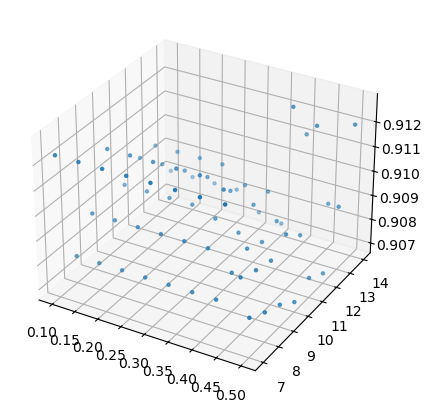

In [158]:
xs = np.linspace(0.1, 0.5, 9)
ys = np.arange(7, 15, dtype=int)
xys = np.dstack(np.meshgrid(xs, ys)).reshape(-1, 2)
aris = [compute(x, int(y)) for x, y in xys]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, xys.T[0], xys.T[1], aris, marker='.')

__Ваша задача__ - перебирать различные параметры hdbscan (метрику, минимальный размер кластера и т.д. - надо залезть в документацию hdbscan и посмотреть, что там реализовано), чтобы получить `ARI 0.900` (а вообще, чем больше, тем лучше - удивите нас).


### 5. *EM-алгоритм

Задача матричного разложения (аппроксимация матрицы произведением двух других матриц меньшего ранга) с ограничениями (например, условие положительности элементов) не решается в общем случае с помощью сингулярного разложения. Для решения такой задачи может использоваться ЕМ-алгоритм. Изучим его на примере другой простой модельной задачи.

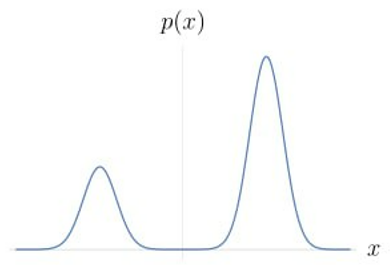

Пусть дана выборка точек $x_i$, взятая из смеси гауссовых распределений:

$$
p(x)=\alpha \cdot \mathcal{N}_{\mu_1, \sigma_1}(x)+(1-\alpha) \cdot \mathcal{N}_{\mu_2, \sigma_2}(x) .
$$

Тогда можно поставить задачу оценки параметров $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ по выборке $\left\{x_i\right\}$.
- Покажите, что задача максимизации обычного правдоподобия $\prod_i p\left(x_i\right) \longrightarrow \max _{\alpha, \mu_1, \mu_2}$ плохо определена. Какие значения параметров максимизируют такое правдоподобие?
- Сгенерируйте данные (просто два сгустка точек, хорошо видных при реализации) и найдите параметры $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ с помощью ЕМ-алгоритма. Инициализировать параметры можно какими-то случайными значениями.
ЕМ-алгоритм состоит из двух чередующихся шагов:
>1. M(Maximization)-шаг. Относим каждую точку $x_i$ к первой или второй гауссиане, сравнивая значения правдоподобия для каждой компоненты смеси:
>
>$$
a\left(x_i\right)= \begin{cases}1, & p_1\left(x_i\right)>p_2\left(x_i\right), \\ 2, & p_2\left(x_i\right)>p_1\left(x_i\right),\end{cases}
$$
>
>где $p_1(x)=\alpha \mathcal{N}_{\mu_1, \sigma_1}(x), \; \; p_2(x)=(1-\alpha) \mathcal{N}_{\mu_2, \sigma_2}(x)$.
>
>2. E( Expectation)-шаг. Находим параметры $\mu_1, \sigma_1$ и $\mu_2, \sigma_2$, максимизируя правдоподобие (или его логарифм) отдельно по точкам, отнесенным к каждой гауссиане:
>
>$$
\begin{gathered}
\prod_{x_i: a\left(x_i\right)=1} p_1\left(x_i\right) \longrightarrow \max _{\mu_1, \sigma_1} \\
\prod_{x_i: a\left(x_i\right)=2} p_2\left(x_i\right) \longrightarrow \max _{\mu_2, \sigma_2}
\end{gathered}
$$

__Примечание.__ При нахождении параметра $\alpha$ можно оптимизировать обычное правдоподобие $\prod_i p\left(x_i\right)$. Все такие максимизации правдоподобия осушествляются аналитически в общем виде для гауссовых распределений. 

__Реализуйте ЕМ-алгоритм.__ Так как метод является итерационным, необходимо выбрать какой-либо критерий остановки, например, прекращать процес, если относительное изменение каждого параметра при очередном шаге меньше некоторого порога. С какой точностью удалось восстановить $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ ?
